In [86]:
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
math.pi

3.141592653589793

In [260]:

class Modulation:
    def __init__(self,bit_period, carrier_freq, signal_length):
        self.bit_period=bit_period
        self.carrier_freq=carrier_freq
        self.signal_length=signal_length
    def message(self):
        return np.random.randint(2, size=self.signal_length) 
    def bpsk(self):
        Tb=self.bit_period
        N=200
        b=self.message()
        print("Message signal for BPSK is "+ str(b))
        NRZ_Out=[]
        NRZ= np.empty((len(b),N))
        Vp=1
        n1=0
        n2=Tb*len(b)
        for i in range(0,len(b)):
    
            if b[i]==1:
                NRZ[i,:]=np.ones((1,N))*Vp
            else:
                NRZ[i,:]=np.ones((1,N))*-Vp
       # print(*NRZ)       
        NRZ_out=NRZ.reshape(1,len(b)*N)
        n=np.arange(n1,n2,1/N)
        n=n.reshape(1,len(b)*N)
        f=self.carrier_freq
        coeff=math.sqrt(2/Tb)
        angles=2*math.pi*f*n
        c=coeff*np.sin(angles)
        Modulated=NRZ_out*c
        return Modulated
    
    def ask(self):
        Tb=self.bit_period
        N=200
        b=self.message()
        print("Message signal for ASK is "+ str(b))
        NRZ_Out=[]
        NRZ= np.empty((len(b),N))
        Vp=1
        n1=0
        n2=Tb*len(b)
        for i in range(0,len(b)):
    
            if b[i]==1:
                NRZ[i,:]=np.ones((1,N))*Vp
            else:
                NRZ[i,:]=np.ones((1,N))*0
       # print(*NRZ)       
        NRZ_out=NRZ.reshape(1,len(b)*N)
        n=np.arange(n1,n2,1/N)
        n=n.reshape(1,len(b)*N)
        f=self.carrier_freq
        coeff=math.sqrt(2/Tb)
        angles=2*math.pi*f*n
        c=coeff*np.sin(angles)
        Modulated=NRZ_out*c
        return Modulated
    
    def fsk(self):
        Tb=self.bit_period
        N=200
        b=self.message()
        print("Message signal for FSK is "+ str(b))
        fc0=self.carrier_freq
        fc1=self.carrier_freq+5
        t=np.arange(0,Tb,1/N)
        #print(t.shape)
        coeff=math.sqrt(2/Tb)
        angles0=2*math.pi*fc0*t
        angles1=2*math.pi*fc1*t
        c0=coeff*np.sin(angles0)
        c1=coeff*np.sin(angles1)
        t1=0.0
        t2=Tb
        fsk_sig=np.empty((len(b),N))
        for i in range(0,len(b)):
            t=np.arange(t1,t2,1/N)
            if b[i]==1:
                b_s=np.ones((1,N))*c1
            else:
                b_s=np.ones((1,N))*c0
            fsk_sig[i,:]=b_s
            
            t1=t1+Tb
            t2=t2+Tb
            
        
        modulated=fsk_sig.reshape(1,len(b)*N)
            
        
        return modulated
    def draw_plot(self):
        
        bpsk=self.bpsk()
        ask=self.ask()
        fsk=self.fsk()
        
        
        Tb=self.bit_period
        N=200
        n1=0
        n2=Tb*self.signal_length
        n=np.arange(n1,n2,1/N)
        fsk=fsk.reshape(N*self.signal_length,)
        ask=ask.reshape(N*self.signal_length,)
        bpsk=bpsk.reshape(N*self.signal_length,)
        plt.subplot(3,1,1)
        sns.lineplot(n,bpsk)
        plt.title("BPSK signal",{'fontsize':12})
        plt.xlabel('n-->',{'fontsize':10})
        plt.ylabel('Amplitude (volts)-->',{'fontsize':9})
        plt.subplot(3,1,2)
        sns.lineplot(n,ask)
        plt.title("ASK signal",{'fontsize':12})
        plt.xlabel('n-->',{'fontsize':10})
        plt.ylabel('Amplitude (volts)-->',{'fontsize':9})
        plt.subplot(3,1,3)
        sns.lineplot(n,fsk)
        plt.title("FSK signal",{'fontsize':12})
        plt.xlabel('n-->',{'fontsize':10})
        plt.ylabel('Amplitude (volts)-->',{'fontsize':9})

In [261]:
c=Modulation(1.0,10,6)

Message signal for BPSK is [0 0 0 0 1 0]
Message signal for ASK is [1 1 1 1 1 0]
Message signal for FSK is [1 0 1 0 0 0]


C:\Users\Wasif\anaconda3\envs\prac\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Wasif\anaconda3\envs\prac\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Wasif\anaconda3\envs\prac\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warning

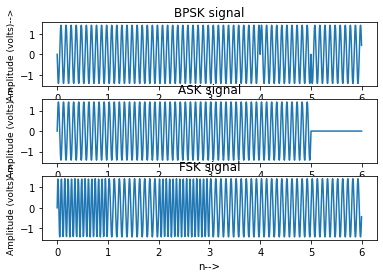

In [262]:
c.draw_plot()